## Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

#### Task 1: Merging 12 months of sales data into a single CSV file

In [2]:
df=pd.read_csv('./Data/Sales_April_2019.csv')

files=[file for file in os.listdir('./Data')]

all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv('./Data/'+file)
    all_months_data= pd.concat([all_months_data,df])
    
all_months_data.to_csv('annual.csv',index=False)

   #### Read in Updated dataframe

In [3]:
annual= pd.read_csv('annual.csv')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data

##### Drop rows of NAN

In [4]:
nan_df= annual[annual.isna().any(axis=1)]
nan_df.head()

annual.dropna(axis='index',how='all',inplace=True)
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Drop rows where the values are same as col name

In [5]:
filt=annual['Order Date']=='Order Date'
annual.drop(index=annual[filt].index, inplace=True)

##### Convert columns to correct type

In [6]:
annual['Quantity Ordered'] = pd.to_numeric(annual['Quantity Ordered'])
annual['Price Each'] = pd.to_numeric(annual['Price Each'])

annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 2 : Add Month Column

In [7]:
annual['Month'] = annual['Order Date'].str[0:2]
annual['Month']=annual['Month'].astype('int32')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [8]:
annual['Sales'] = annual['Quantity Ordered']*annual['Price Each']
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [9]:
annual.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [10]:
cols=list(annual.columns)
cols

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month',
 'Sales']

In [11]:
annual=annual[cols[0:4]+[cols[-1]]+cols[4:len(cols)-1]]
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 4: Add a city column

In [12]:
annual['City']=annual['Purchase Address'].apply(lambda x: x.split(',')[1]+','+x.split(',')[2].split(' ')[1])
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA"


#### Q1: What was the best month for sales? How much was earned that month?

In [13]:
results=annual.groupby('Month').sum()
results

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\3071353877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=annual.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


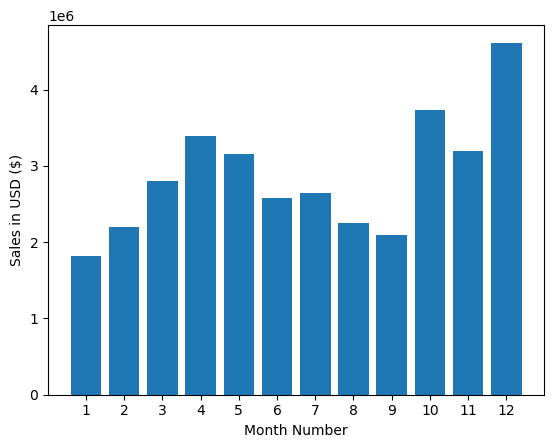

In [14]:
import matplotlib.pyplot as plt

months= range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Q2: Which city had the highest number of sales?

In [15]:
result2=annual.groupby('City').sum()
result2

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\2777273939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2=annual.groupby('City').sum()


,Quantity Ordered,Price Each,Sales,Month
City,,,,
"Atlanta,GA",16602,2779908.20,2795498.58,104794
"Austin,TX",11153,1809873.61,1819581.75,69829
"Boston,MA",22528,3637409.77,3661642.01,141112
"Dallas,TX",16730,2752627.82,2767975.40,104620
"Los Angeles,CA",33289,5421435.23,5452570.80,208325
"New York City,NY",27932,4635370.83,4664317.43,175741
"Portland,ME",2750,447189.25,449758.27,17144
"Portland,OR",11303,1860558.22,1870732.34,70621
"San Francisco,CA",50239,8211461.74,8262203.91,315520


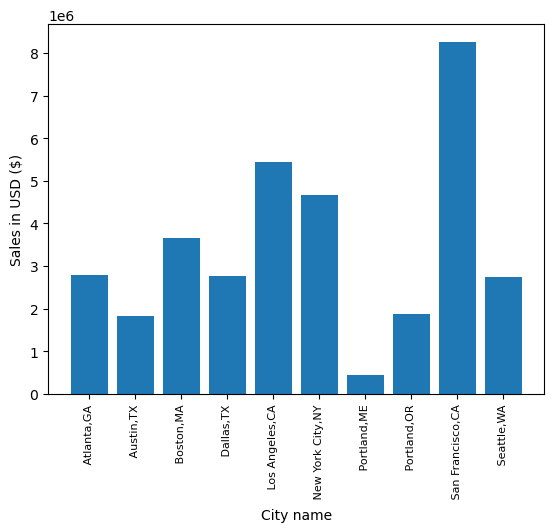

In [16]:
import matplotlib.pyplot as plt

cities = [city for city,df in annual.groupby('City')]

plt.bar(cities,result2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA"


In [18]:
annual['Order Date']=pd.to_datetime(annual['Order Date'])

In [19]:
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA"
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA"


In [20]:
annual['Hour'] = annual['Order Date'].dt.hour
annual['Minute'] = annual['Order Date'].dt.minute
annual=annual.drop(columns='Minute')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas,TX",8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA",22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA",9


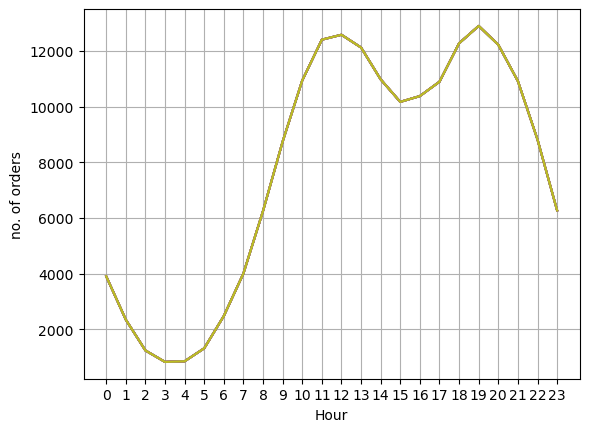

In [21]:
hours=[hour for hour,df in annual.groupby('Hour')]

# plotting line graph

plt.plot(hours, annual.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('no. of orders')


plt.show()

##### Ans3: around 11 or 18

#### Q4: What products are most often sold together?

In [22]:
# same orderid means ordered together

In [23]:
df = annual[annual['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles,CA",19
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles,CA",19
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,"Boston,MA",11
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,"Boston,MA",11
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,"San Francisco,CA",17
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,"San Francisco,CA",17
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,"New York City,NY",11
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,"New York City,NY",11


In [24]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\3979233859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles,CA",19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles,CA",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,"Boston,MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [25]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(20)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##### Ans : iPhone, Lightning Charging Cable

#### Q5: What product got sold the most? Why do you think it got sold the most?

In [45]:
product_group= annual.groupby('Product')

product_group.sum().sort_values('Quantity Ordered', ascending= False)

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\1482786736.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum().sort_values('Quantity Ordered', ascending= False)


,Quantity Ordered,Price Each,Sales,Month,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529
Wired Headphones,20557,226395.18,246478.43,133397,271720
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540
iPhone,6849,4789400.00,4794300.00,47941,98657


C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\2233651607.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


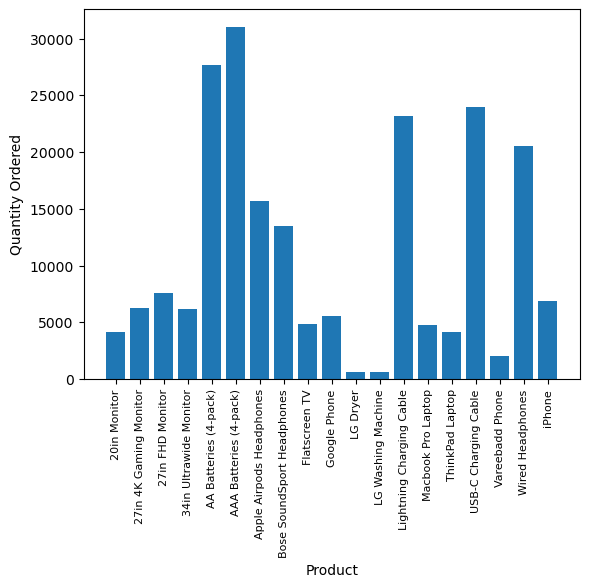

In [50]:
# making bar chart

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)

plt.show()

In [52]:
prices = annual.groupby('Product').mean()['Price Each']
prices

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\1995890718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = annual.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Riya Shah\AppData\Local\Temp\ipykernel_8800\38584428.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  x1.set_xticklabels(products, rotation='vertical', size=8)


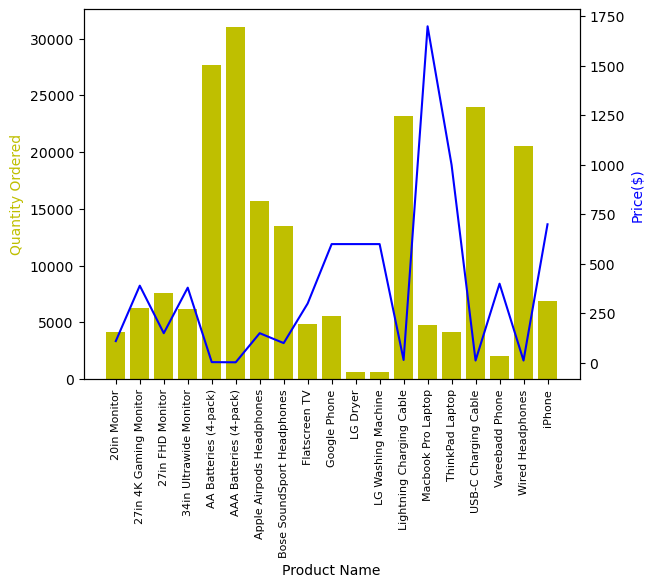

In [58]:
fig, x1 = plt.subplots()

x2 = x1.twinx()
x1.bar(products, quantity_ordered, color='y')
x2.plot(products, prices, 'b-')

x1.set_xlabel('Product Name')
x1.set_ylabel('Quantity Ordered', color='y')
x2.set_ylabel('Price($)',color='b')
x1.set_xticklabels(products, rotation='vertical', size=8)


plt.show()


 ##### Ans: AAA Batteries (4-pack) were sold the most as prices are low comparatively